<a href="https://colab.research.google.com/github/maya034/Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

STATE: 51 Unique States

Account Length. Length of The Account

Area Code 415 relates to San Francisco,408 is of San Jose and 510 is of City of Okland

International Plan Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

Voice Mail Plan Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

Number vmail messages Number of Voice Mail Messages ranging from 0 to 50

Total day minutes Total Number of Minutes Spent By Customers in Morning

Total day calls Total Number of Calls made by Customer in Morning.

Total day charge Total Charge to the Customers in Morning.

Total eve minutesTotal Number of Minutes Spent By Customers in Evening

Total eve calls Total Number of Calls made by Customer in Evening.

Total eve charge Total Charge to the Customers in Morning.

Total night minutes Total Number of Minutes Spent By Customers in the Night.

Total night calls Total Number of Calls made by Customer in Night.

Total night charge Total Charge to the Customers in Night. 

## New Section

In [ ]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_path='/content/drive/MyDrive/Colab Notebooks/Telecom Churn.csv'
df=pd.read_csv(working_path)

In [ ]:
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
df[['State','Churn']]

,State,Churn
0,KS,False
1,OH,False
2,NJ,False
3,OH,False
4,OK,False
...,...,...
3328,AZ,False
3329,WV,False
3330,RI,False
3331,CT,False


In [ ]:
df.groupby('State')['Churn'].value_counts().sort_values(ascending=True)

State  Churn
AK     True      3
IA     True      3
HI     True      3
LA     True      4
AZ     True      4
                ..
MN     False    69
WI     False    71
AL     False    72
VA     False    72
WV     False    96
Name: Churn, Length: 102, dtype: int64

In [ ]:
st=pd.DataFrame(s)

In [ ]:
st

,,Churn
State,Churn,
AK,True,3
IA,True,3
HI,True,3
LA,True,4
AZ,True,4
...,...,...
MN,False,69
WI,False,71
AL,False,72


In [ ]:
len(set(list(df['State'])))

51

In [ ]:
df['State'].nunique()

51

In [ ]:
df['Area code'].nunique()

3

In [ ]:
df['Area code'].value_counts()

415    1655
510     840
408     838
Name: Area code, dtype: int64

In [ ]:
df.groupby('Area code')['State'].value_counts(normalize=True)

Area code  State
408        AL       0.029833
           CO       0.029833
           NC       0.029833
           NH       0.029833
           VA       0.029833
                      ...   
510        LA       0.013095
           MO       0.013095
           NM       0.013095
           CA       0.011905
           HI       0.009524
Name: State, Length: 153, dtype: float64

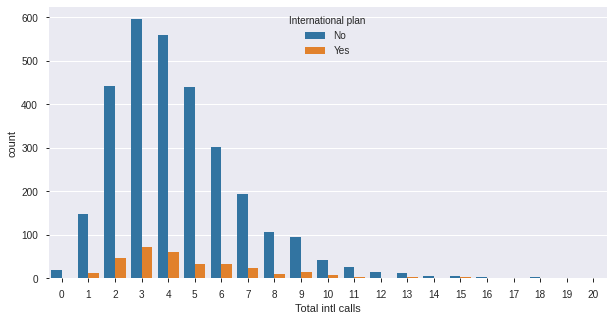

In [ ]:
#pd.crosstab(df['Total intl calls'],df['Churn'],margins=True).plot(kind='bar')
sns.countplot(x = 'Total intl calls', hue = 'International plan', data = df)


#pd.crosstab(df['Total intl calls'],df['State'],normalize='index').plot(kind='bar')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

In [ ]:
df.isna().sum()

In [ ]:
a=df['Total intl minutes'].describe()

In [ ]:
b=df['Total intl calls'].describe()

In [ ]:
c=df['Total intl charge'].describe()

In [ ]:
intl_call=pd.DataFrame(a,b,c).reset_index

In [ ]:
df_=df[['Total intl minutes','Total intl calls','Total intl charge','Churn']]

In [ ]:
df_.set_index('Churn')

,Total intl minutes,Total intl calls,Total intl charge
Churn,,,
False,10.0,3,2.70
False,13.7,3,3.70
False,12.2,5,3.29
False,6.6,7,1.78
False,10.1,3,2.73
...,...,...,...
False,9.9,6,2.67
False,9.6,4,2.59
False,14.1,6,3.81


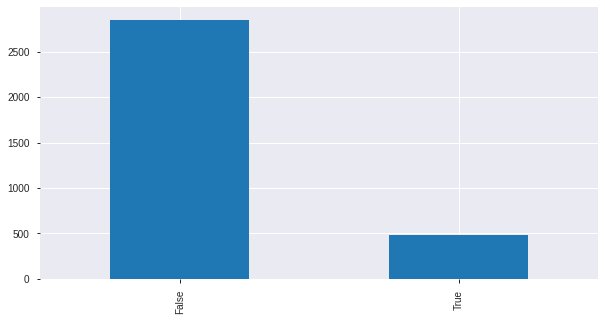

In [ ]:

df['Churn'].value_counts().plot(kind='bar')



In [ ]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [ ]:
s=df[df['Churn']==True]

In [ ]:
s.groupby(['Churn','State','Area code'])['Total intl calls'].value_counts()

Churn  State  Area code  Total intl calls
True   AK     415        1                   1
                         2                   1
                         3                   1
       AL     408        3                   1
                         4                   1
                                            ..
       WY     415        7                   1
              510        2                   1
                         3                   1
                         5                   1
                         10                  1
Name: Total intl calls, Length: 367, dtype: int64

In [ ]:
s.groupby(['Churn'])['Total intl calls'].value_counts().sort_values(ascending=False)

Churn  Total intl calls
True   2                   108
       3                    98
       4                    79
       5                    53
       6                    43
       1                    31
       7                    27
       9                    14
       8                    11
       10                    8
       11                    4
       15                    3
       20                    1
       14                    1
       13                    1
       12                    1
Name: Total intl calls, dtype: int64

In [ ]:
s.groupby(['Churn'])['Total intl minutes'].value_counts().sort_values(ascending=False)

Churn  Total intl minutes
True   13.9                  11
       8.8                   10
       10.3                  10
       11.0                  10
       11.1                  10
                             ..
       4.3                    1
       4.2                    1
       3.9                    1
       2.0                    1
       20.0                   1
Name: Total intl minutes, Length: 119, dtype: int64

In [ ]:
t=df[df['Churn']==False]

In [ ]:
t.groupby(['Churn'])['Total intl calls'].value_counts().sort_values(ascending=False)

Churn  Total intl calls
False  3                   570
       4                   540
       5                   419
       2                   381
       6                   293
       7                   191
       1                   129
       8                   105
       9                    95
       10                   42
       11                   24
       0                    18
       12                   14
       13                   13
       14                    5
       15                    4
       18                    3
       16                    2
       17                    1
       19                    1
Name: Total intl calls, dtype: int64

In [ ]:
t.groupby(['Churn'])['Total intl minutes'].value_counts().sort_values(ascending=False)

Churn  Total intl minutes
False  10.0                  55
       11.3                  52
       9.8                   51
       10.6                  49
       10.2                  48
                             ..
       2.2                    1
       2.0                    1
       1.3                    1
       1.1                    1
       18.9                   1
Name: Total intl minutes, Length: 159, dtype: int64

### Total intl minutes

In [ ]:
print(df['Total intl minutes'].max())
print(round(df['Total intl minutes'].max()/60))  #in hours
print(df['Total intl minutes'].min())
print(df['Total intl minutes'].mean())

20.0
0
0.0
10.237293729372933


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


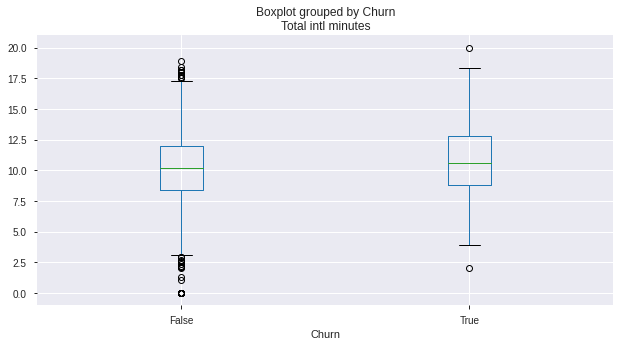

In [ ]:
plt.show()
df.boxplot(column='Total intl minutes', by='Churn')


## Total intl calls

In [ ]:
print(df['Total intl calls'].max())
print(df['Total intl calls'].min())
print(df['Total intl calls'].mean())

20
0
4.4794479447944795


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


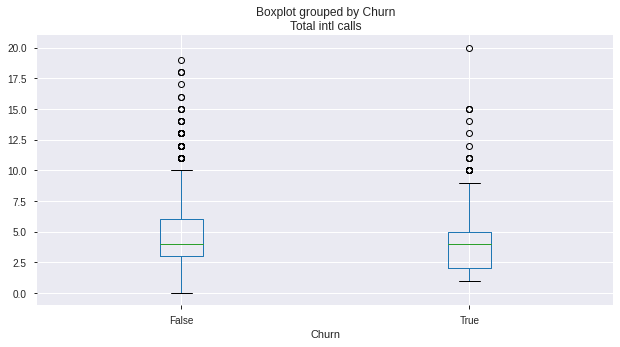

In [ ]:
plt.show()
df.boxplot(column='Total intl calls', by='Churn')

In [ ]:
s['International plan'].value_counts()

No     346
Yes    137
Name: International plan, dtype: int64

In [ ]:
 clients with no International Plan will have to pay more and they might leave this operator.


### Total intl charge

In [ ]:
print(df['Total intl charge'].max())
print(df['Total intl charge'].min())
print(df['Total intl charge'].mean())

5.4
0.0
2.764581458145804


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


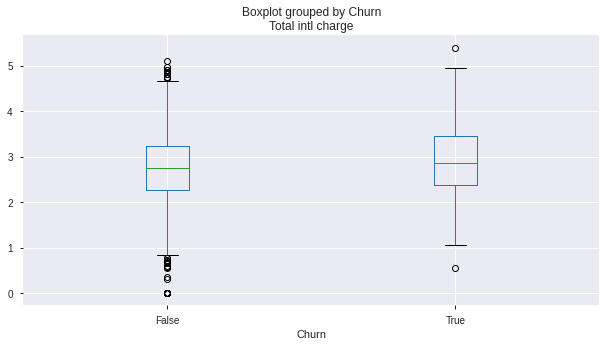

In [ ]:
plt.show()
df.boxplot(column='Total intl charge', by='Churn')

In [ ]:
t.max()

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         315.6
Total day calls             163
Total day charge          53.65
Total eve minutes         361.8
Total eve calls             170
Total eve charge          30.75
Total night minutes         395
Total night calls           175
Total night charge        17.77
Total intl minutes         18.9
Total intl calls             19
Total intl charge           5.1
Customer service calls        8
Churn                     False
dtype: object

##  Call Rate and better Pricing Strategy  Optimization would lead to lower churn rate

In [ ]:
pd.crosstab(df['Churn'],df['Total intl calls'], margins = True)


Total intl calls,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,All
Churn,,,,,,,,,,,,,,,,,,,,,,
False,18,129,381,570,540,419,293,191,105,95,42,24,14,13,5,4,2,1,3,1,0,2850
True,0,31,108,98,79,53,43,27,11,14,8,4,1,1,1,3,0,0,0,0,1,483
All,18,160,489,668,619,472,336,218,116,109,50,28,15,14,6,7,2,1,3,1,1,3333


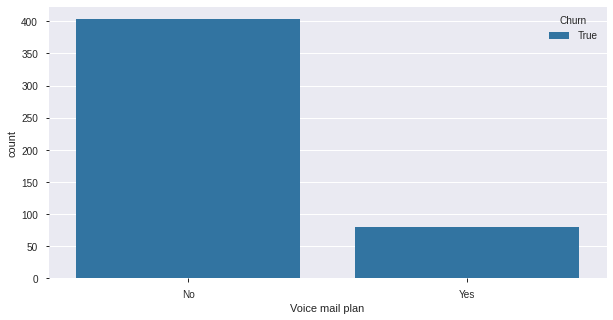

In [ ]:
sns.countplot(x = 'Voice mail plan', hue = 'Churn', data = s)

In [ ]:
s['Voice mail plan'].value_counts()

No     403
Yes     80
Name: Voice mail plan, dtype: int64

In [ ]:
s.groupby('Voice mail plan')['Churn'].value_counts()

Voice mail plan  Churn
No               True     403
Yes              True      80
Name: Churn, dtype: int64